# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-09-24 23:59:36--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-09-24 23:59:37--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [7]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

Total Quantity by Country:


,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592



Mean Unit Price by Country:


,UnitPrice
Country,
Australia,3.220612
Austria,4.243192
Bahrain,4.556316
Belgium,3.644335
Brazil,4.456250
Canada,6.030331
Channel Islands,4.932124
Cyprus,6.302363
Czech Republic,2.938333


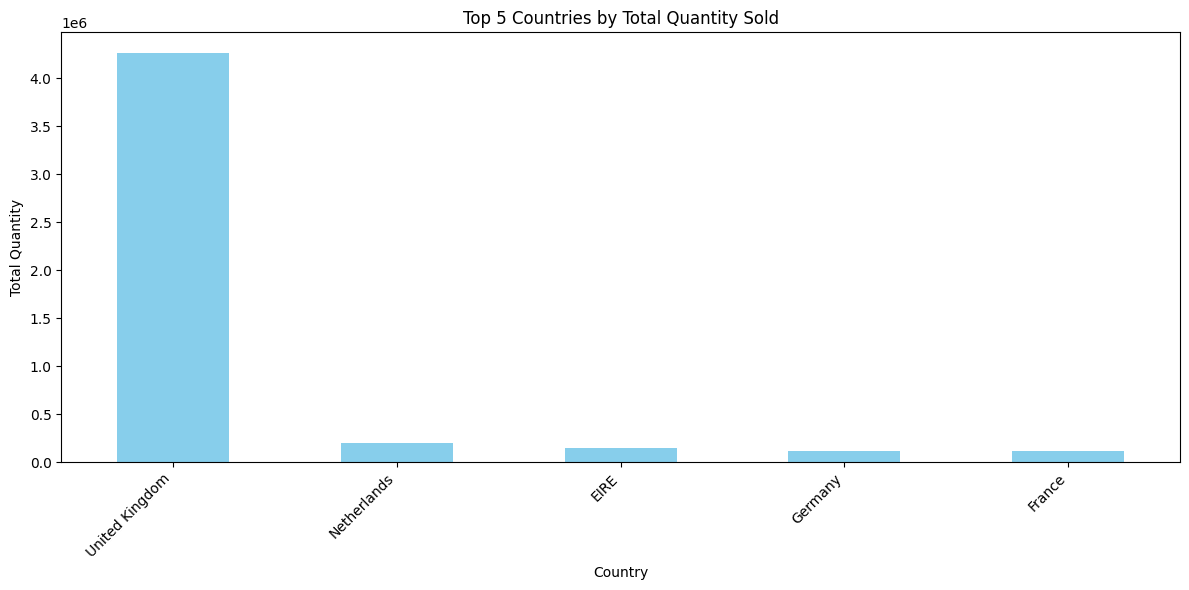

In [21]:
country_group = data.groupby('Country')

# Calculate the total quantity sold by country
total_quantity_by_country = country_group['Quantity'].sum()
print("Total Quantity by Country:")
display(total_quantity_by_country)

# Calculate the mean unit price by country
mean_unit_price_by_country = country_group['UnitPrice'].mean()
print("\nMean Unit Price by Country:")
display(mean_unit_price_by_country)

# Visualize the total quantity by country for the top 5 countries
plt.figure(figsize=(12, 6))
total_quantity_by_country.nlargest(5).plot(kind='bar', color='skyblue') # Plotting the top 5 of the series
plt.title('Top 5 Countries by Total Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

Frequency of each StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64


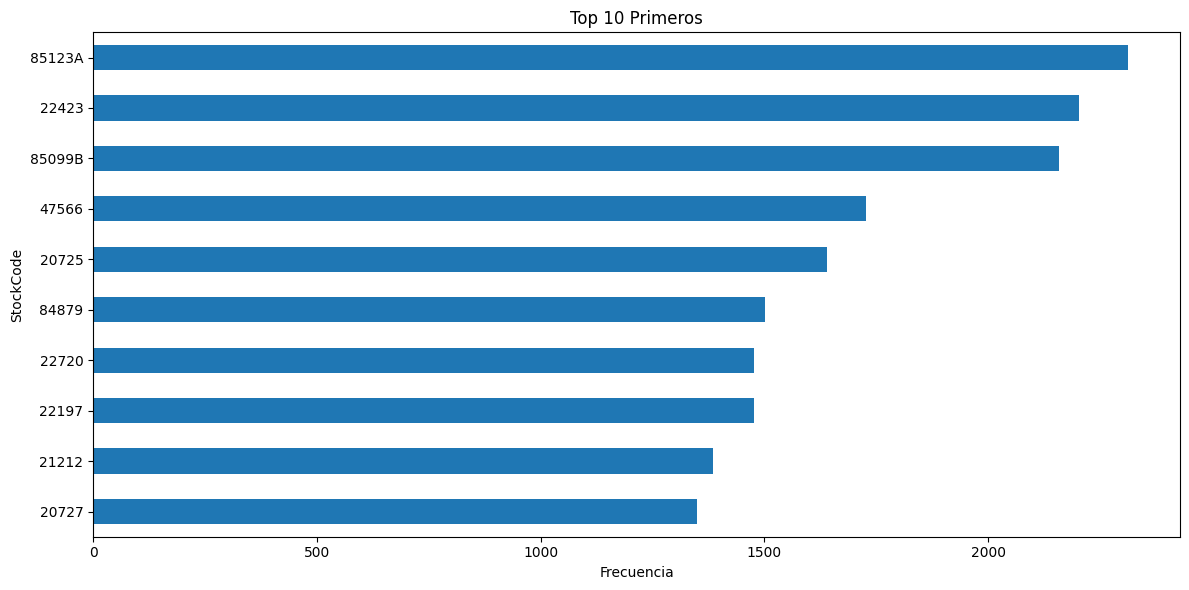

In [24]:
# Group by StockCode and count the frequency of each product
stockcode_counts = data['StockCode'].value_counts()
print("Frequency of each StockCode:")
print(stockcode_counts)

# Visualize the top 10 most frequent StockCodes with a horizontal bar chart
plt.figure(figsize=(12, 6))
stockcode_counts.nlargest(10).plot(kind='barh')
plt.title('Top 10 Primeros')
plt.xlabel('Frecuencia')
plt.ylabel('StockCode')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

Total Sales per Invoice:


,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
C581484,-168469.60
C581490,-32.53
C581499,-224.69



Average Invoice Total (Filtered):
331.2094492425426


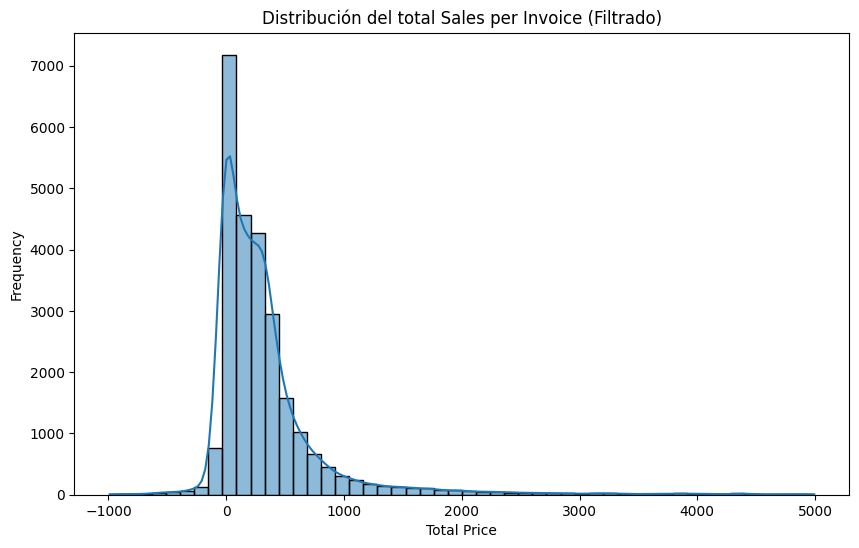

In [31]:
# 1. Create a new column called TotalPrice that is the product of Quantity and UnitPrice.
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# 2. Group the data by InvoiceNo and calculate the sum of TotalPrice for each invoice.
invoice_totals = data.groupby('InvoiceNo')['TotalPrice'].sum()
print("Total Sales per Invoice:")
display(invoice_totals)

# Apply conditional filtering
filtered_invoice_totals = invoice_totals[(invoice_totals >= -1000) & (invoice_totals <= 5000)]

# 3. Calculate the average (mean) invoice total for the filtered data.
average_invoice_total_filtered = filtered_invoice_totals.mean()
print("\nAverage Invoice Total (Filtered):")
print(average_invoice_total_filtered)

# Visualize the distribution of filtered invoice totals with a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(filtered_invoice_totals, bins=50, kde=True)
plt.title('Distribución del total Sales per Invoice (Filtrado)')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

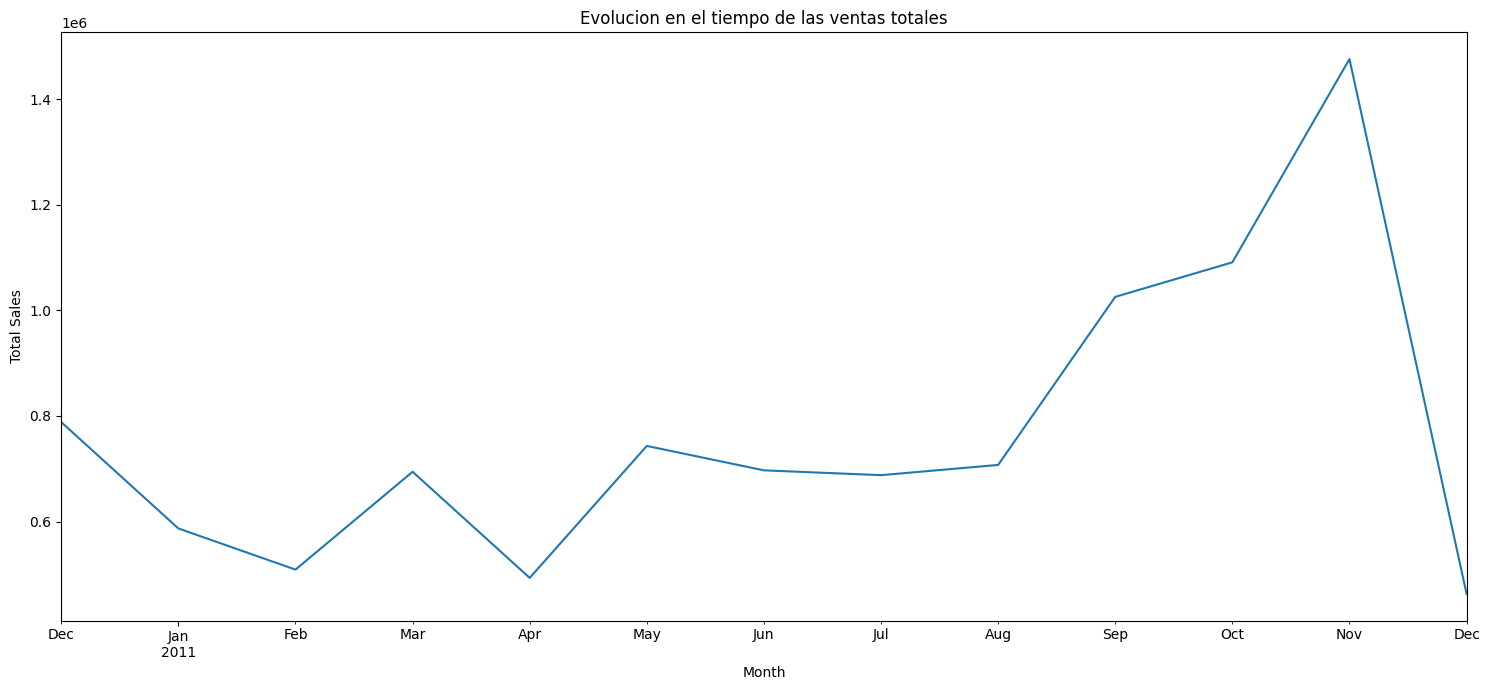

In [56]:
# Apply conditional filtering to the data before grouping
filtered_data = data[(data['TotalPrice'] >= -5000) & (data['TotalPrice'] <= 5000)].copy()

# Extract month and year for monthly grouping
filtered_data['InvoiceMonth'] = filtered_data['InvoiceDate'].dt.to_period('M')

# Group by month and calculate the sum of TotalPrice for each month
monthly_sales_filtered = filtered_data.groupby('InvoiceMonth')['TotalPrice'].sum()

# Visualize the temporal evolution of sales by month with a line plot
plt.figure(figsize=(15, 7))
monthly_sales_filtered.plot(kind='line')
plt.title('Evolucion en el tiempo de las ventas totales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

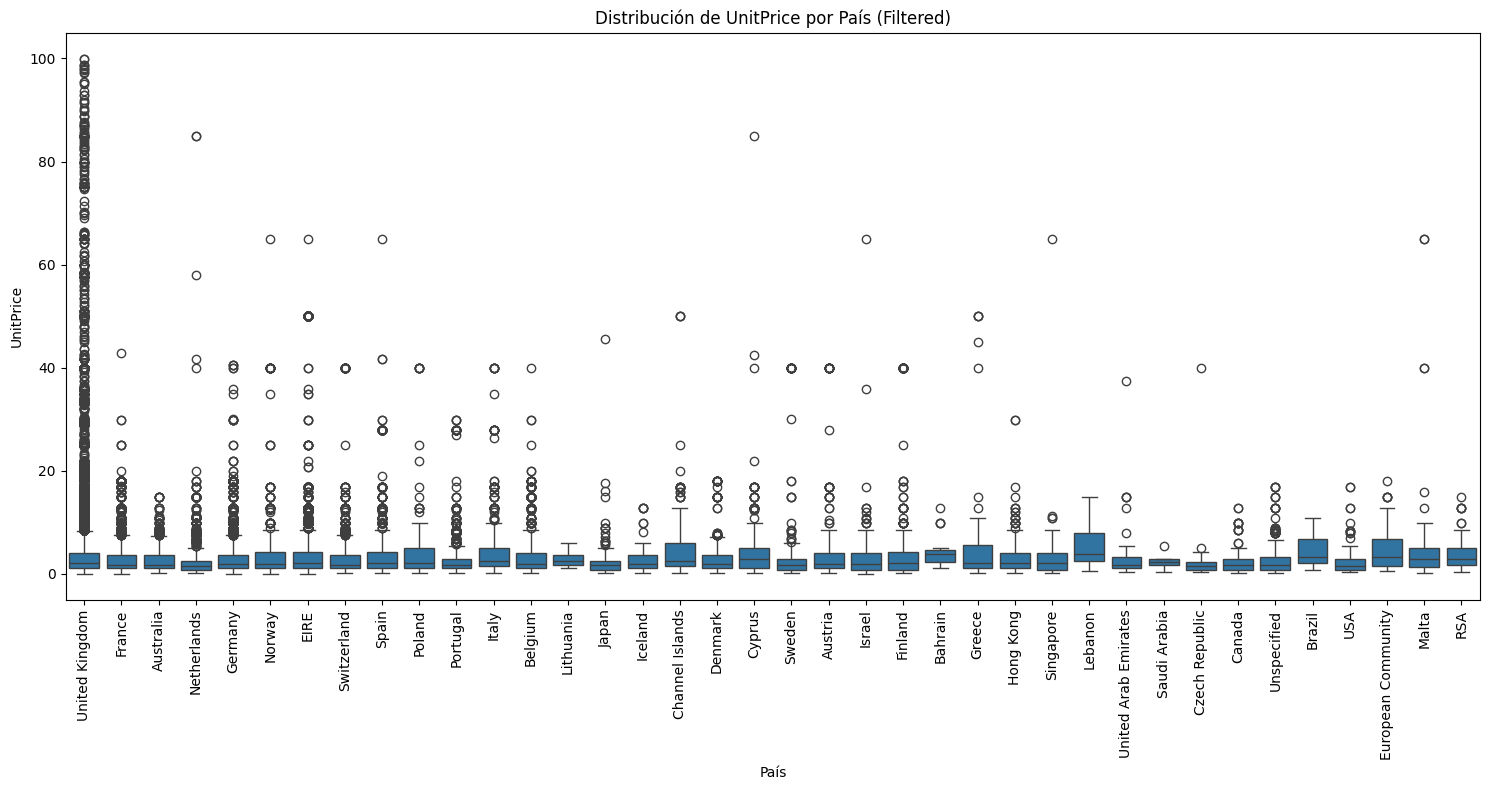

In [43]:
# Filter out extreme UnitPrice values to improve boxplot readability
filtered_data_price = data[(data['UnitPrice'] > 0) & (data['UnitPrice'] < 100)].copy()

# Create a boxplot of UnitPrice by Country using the filtered data
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='UnitPrice', data=filtered_data_price)
plt.title('Distribución de UnitPrice por País (Filtered)')
plt.xlabel('País')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

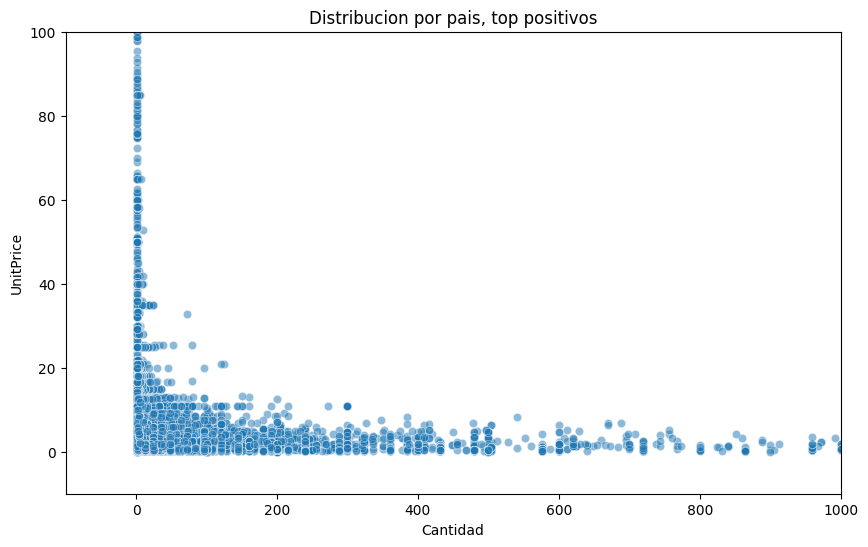

In [55]:
# Filter data to include only positive Quantity and UnitPrice
filtered_data_scatter = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)].copy()

# Create a scatter plot between Quantity and UnitPrice with filtering and alpha for overplotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=filtered_data_scatter, alpha=0.5) # Using alpha to help with overplotting
plt.title('Distribucion por pais, top positivos')
plt.xlabel('Cantidad')
plt.ylabel('UnitPrice')
plt.xlim(-100, 1000) # Limit x-axis to a reasonable range to avoid extreme outliers
plt.ylim(-10, 100) # Limit y-axis to a reasonable range to avoid extreme outliers
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

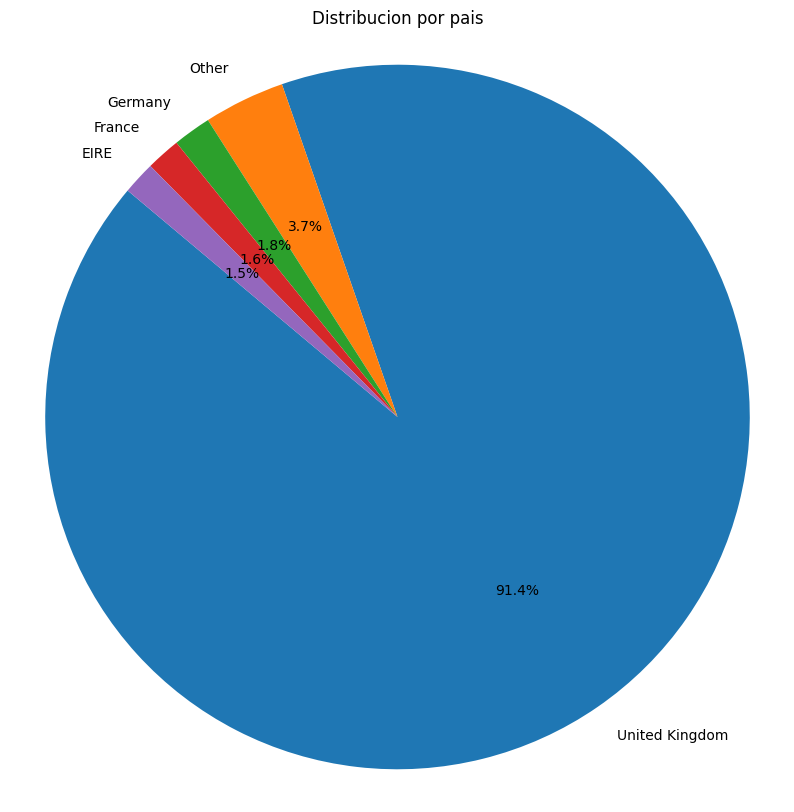

In [49]:
# Count the occurrences of each country
country_counts = data['Country'].value_counts()

# Calculate the percentage for each country
country_percentages = country_counts / len(data) * 100

# Determine a threshold for small percentages (e.g., less than 1%)
threshold = 1

# Filter out countries below the threshold and group the rest into 'Other'
small_countries = country_percentages[country_percentages < threshold]
large_countries = country_percentages[country_percentages >= threshold]

# Create a new series with 'Other' category
pie_data = large_countries.copy()
if not small_countries.empty:
    pie_data['Other'] = small_countries.sum()

# Sort the data for better visualization
pie_data = pie_data.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion por pais')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

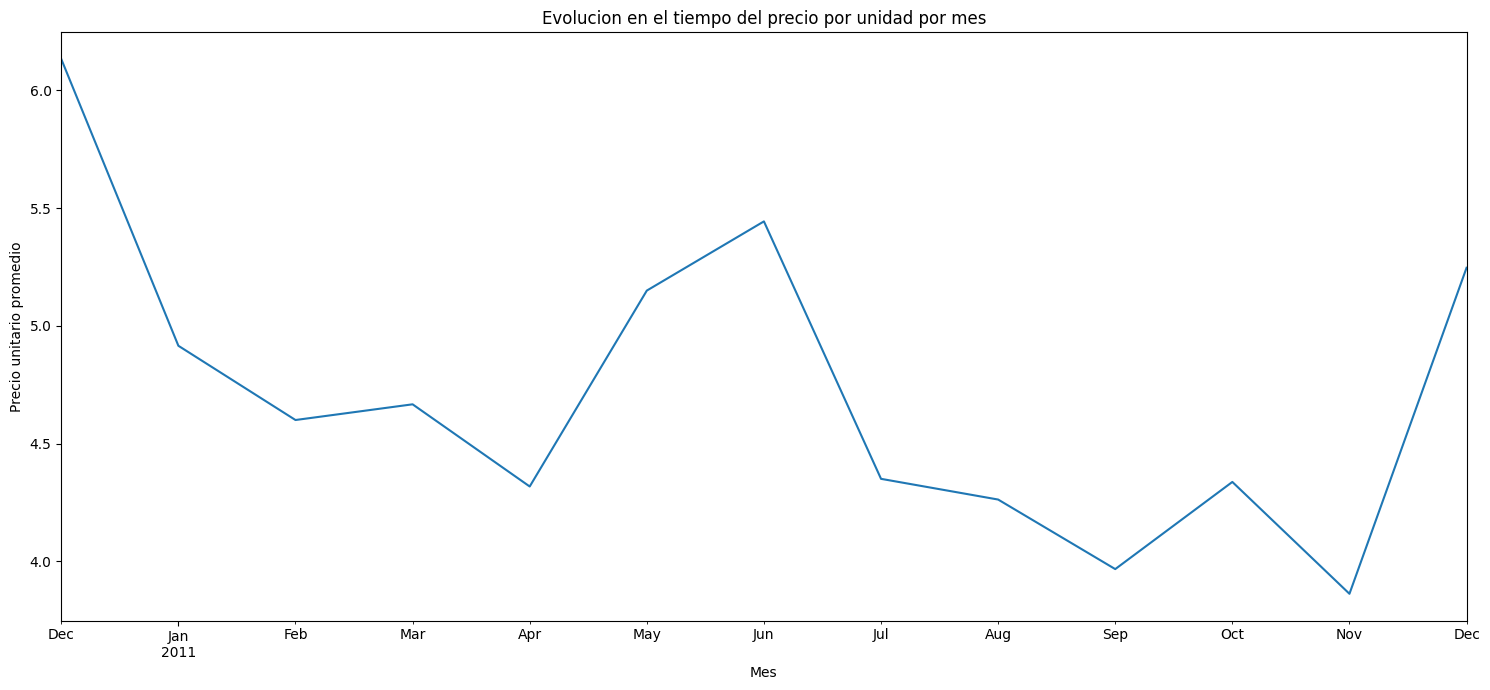

In [52]:
# Extract month and year for monthly grouping
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

# Group by month and calculate the mean UnitPrice for each month
monthly_avg_unit_price = data.groupby('InvoiceMonth')['UnitPrice'].mean()

# Visualize the temporal evolution of average unit price by month with a line plot
plt.figure(figsize=(15, 7))
monthly_avg_unit_price.plot(kind='line')
plt.title('Evolucion en el tiempo del precio por unidad por mes')
plt.xlabel('Mes')
plt.ylabel('Precio unitario promedio')
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

Frequency of each Product Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                            1
Name: count, Length: 4223, dtype: int64


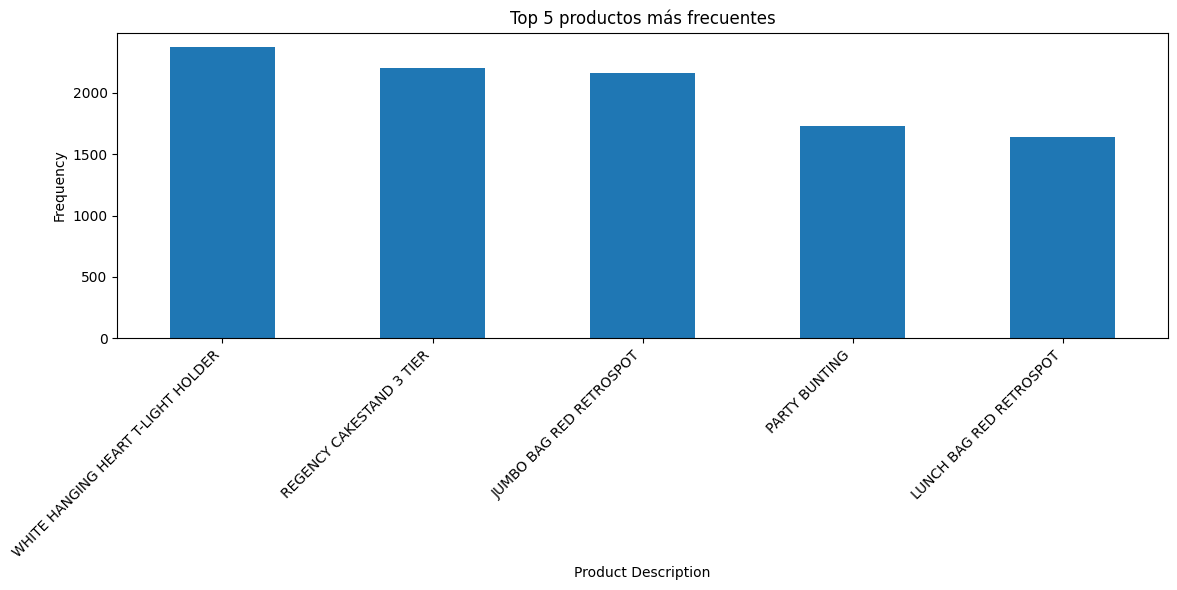

In [53]:
# Group by Description and count the frequency of each product
description_counts = data['Description'].value_counts()
print("Frequency of each Product Description:")
print(description_counts)

# Visualize the top 5 most frequent products with a vertical bar chart
plt.figure(figsize=(12, 6))
description_counts.nlargest(5).plot(kind='bar')
plt.title('Top 5 productos más frecuentes')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.